In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence de la varicelle sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1991 et se termine avec une semaine récente.

Nous vérifions si le fichier csv contenant les données est déjà téléchargé. Si ce n'est pas le cas nous le téléchargeons.

In [2]:
data_url = "https://www.sentiweb.fr/datasets/all/inc-7-PAY.csv"
data_file = "varicelle.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`. Nous précisons aussi l'encodage des données.

In [4]:
raw_data = pd.read_csv(data_file, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202530          7   9815     4803   14827      15           8   
1     202529          7   6436     3413    9459      10           5   
2     202528          7   5584     3123    8045       8           4   
3     202527          7   5667     2850    8484       8           4   
4     202526          7   5872     3285    8459       9           5   
5     202525          7   5953     3698    8208       9           6   
6     202524          7   4580     2558    6602       7           4   
7     202523          7   4911     2663    7159       7           4   
8     202522          7   6837     3940    9734      10           6   
9     202521          7   4693     2653    6733       7           4   
10    202520          7   3083     1535    4631       5           3   
11    202519          7   5084     1997    8171       8           3   
12    202518          7   5003     2718    7288       7           4   
13    202517          7   6246     3424    9068       9           5   
14    202516          7   6151     3193    9109       9           5   
15    202515          7   5557     3262    7852       8           5   
16    202514          7   4984     2858    7110       7           4   
17    202513          7   5964     3608    8320       9           5   
18    202512          7   3855     1995    5715       6           3   
19    202511          7   5878     2747    9009       9           4   
20    202510          7   2921     1421    4421       4           2   
21    202509          7   3381     1468    5294       5           2   
22    202508          7   2835     1286    4384       4           2   
23    202507          7   4502     2382    6622       7           4   
24    202506          7   3455     1958    4952       5           3   
25    202505          7   2087     1056    3118       3           1   
26    202504          7   6895     4466    9324      10           6   
27    202503          7   2462     1161    3763       4           2   
28    202502          7   5966     2757    9175       9           4   
29    202501          7   6059     2451    9667       9           4   
...      ...        ...    ...      ...     ...     ...         ...   
1778  199126          7  17608    11304   23912      31          20   
1779  199125          7  16169    10700   21638      28          18   
1780  199124          7  16171    10071   22271      28          17   
1781  199123          7  11947     7671   16223      21          13   
1782  199122          7  15452     9953   20951      27          17   
1783  199121          7  14903     8975   20831      26          16   
1784  199120          7  19053    12742   25364      34          23   
1785  199119          7  16739    11246   22232      29          19   
1786  199118          7  21385    13882   28888      38          25   
1787  199117          7  13462     8877   18047      24          16   
1788  199116          7  14857    10068   19646      26          18   
1789  199115          7  13975     9781   18169      25          18   
1790  199114          7  12265     7684   16846      22          14   
1791  199113          7   9567     6041   13093      17          11   
1792  199112          7  10864     7331   14397      19          13   
1793  199111          7  15574    11184   19964      27          19   
1794  199110          7  16643    11372   21914      29          20   
1795  199109          7  13741     8780   18702      24          15   
1796  199108          7  13289     8813   17765      23          15   
1797  199107          7  12337     8077   16597      22          15   
1798  199106          7  10877     7013   14741      19          12   
1799  199105          7  10442     6544   14340      18          11   
1800  199104          7   7913     4563   11263      14           8   
1801  199103          7  15387    10484   20290      27          18   
1802  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ? Non. Pas besoin de modifier les données.

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [7]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [8]:
sorted_data = raw_data.set_index('period').sort_index()
sorted_data['inc']

period
1990-12-03/1990-12-09     1143
1990-12-10/1990-12-16    11079
1990-12-17/1990-12-23    19080
1990-12-24/1990-12-30    19375
1990-12-31/1991-01-06    15565
1991-01-07/1991-01-13    16277
1991-01-14/1991-01-20    15387
1991-01-21/1991-01-27     7913
1991-01-28/1991-02-03    10442
1991-02-04/1991-02-10    10877
1991-02-11/1991-02-17    12337
1991-02-18/1991-02-24    13289
1991-02-25/1991-03-03    13741
1991-03-04/1991-03-10    16643
1991-03-11/1991-03-17    15574
1991-03-18/1991-03-24    10864
1991-03-25/1991-03-31     9567
1991-04-01/1991-04-07    12265
1991-04-08/1991-04-14    13975
1991-04-15/1991-04-21    14857
1991-04-22/1991-04-28    13462
1991-04-29/1991-05-05    21385
1991-05-06/1991-05-12    16739
1991-05-13/1991-05-19    19053
1991-05-20/1991-05-26    14903
1991-05-27/1991-06-02    15452
1991-06-03/1991-06-09    11947
1991-06-10/1991-06-16    16171
1991-06-17/1991-06-23    16169
1991-06-24/1991-06-30    17608
                         ...  
2024-12-30/2025-01-05     6059
2

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste, nous pouvons donc continuer.

In [9]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

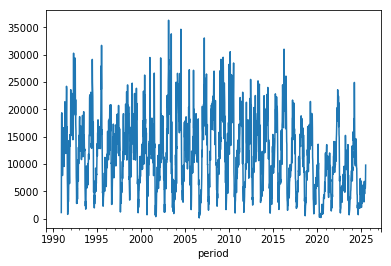

In [10]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver (voire au printemps?). Le creux des incidences se trouve en été (voire début automne?).

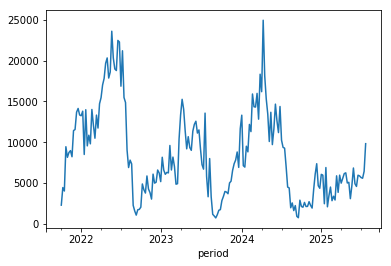

In [11]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er septembre de l'année $N$ au
1er septembre de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er septembre de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er septembre.

Comme l'incidence de la varicelle est très faible en été, cette
modification ne risque pas de fausser nos conclusions.

In [16]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                        for y in range(1991,sorted_data.index[-1].year)]
first_september_week

[Period('1991-08-26/1991-09-01', 'W-SUN'),
 Period('1992-08-31/1992-09-06', 'W-SUN'),
 Period('1993-08-30/1993-09-05', 'W-SUN'),
 Period('1994-08-29/1994-09-04', 'W-SUN'),
 Period('1995-08-28/1995-09-03', 'W-SUN'),
 Period('1996-08-26/1996-09-01', 'W-SUN'),
 Period('1997-09-01/1997-09-07', 'W-SUN'),
 Period('1998-08-31/1998-09-06', 'W-SUN'),
 Period('1999-08-30/1999-09-05', 'W-SUN'),
 Period('2000-08-28/2000-09-03', 'W-SUN'),
 Period('2001-08-27/2001-09-02', 'W-SUN'),
 Period('2002-08-26/2002-09-01', 'W-SUN'),
 Period('2003-09-01/2003-09-07', 'W-SUN'),
 Period('2004-08-30/2004-09-05', 'W-SUN'),
 Period('2005-08-29/2005-09-04', 'W-SUN'),
 Period('2006-08-28/2006-09-03', 'W-SUN'),
 Period('2007-08-27/2007-09-02', 'W-SUN'),
 Period('2008-09-01/2008-09-07', 'W-SUN'),
 Period('2009-08-31/2009-09-06', 'W-SUN'),
 Period('2010-08-30/2010-09-05', 'W-SUN'),
 Period('2011-08-29/2011-09-04', 'W-SUN'),
 Period('2012-08-27/2012-09-02', 'W-SUN'),
 Period('2013-08-26/2013-09-01', 'W-SUN'),
 Period('20

En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [17]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

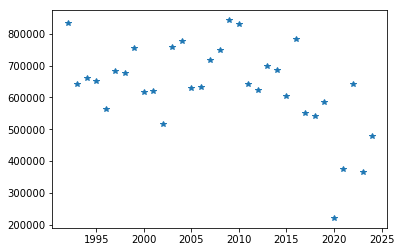

In [18]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus faibles (au début) et les plus élevées (à la fin).

In [19]:
yearly_incidence.sort_values()

2020    221186
2023    366227
2021    376290
2024    479258
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

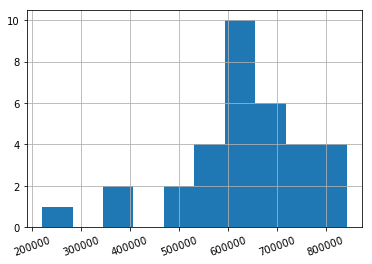

In [20]:
yearly_incidence.hist(xrot=20)